In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Splines Lineales

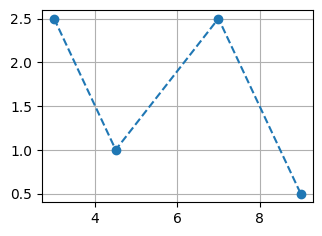

In [21]:
x = [3,4.5,7,9]
y = [2.5,1,2.5,0.5]
fig = plt.figure(figsize=(3.5,2.5))
plt.plot(x,y,'o--')
plt.grid(True)
plt.show()

### Spline Lineal

i:0
m[0] = (y[0+1]-y[0])/(x[0+1]-x[0]) = (1-2.5)/(4.5-3) = -1.0
i:1
m[1] = (y[1+1]-y[1])/(x[1+1]-x[1]) = (2.5-1)/(7-4.5) = 0.6
[5.75 7.  ]
i:2
m[2] = (y[2+1]-y[2])/(x[2+1]-x[2]) = (0.5-2.5)/(9-7) = -1.0
[8. 9.]


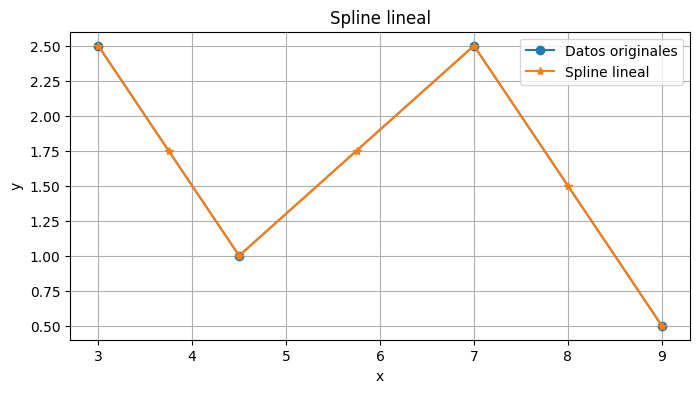

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def spline_lineal(x, y, puntos_por_intervalo=3):
    """
    Construye un spline lineal entre los puntos dados.
    Args:
        x (list): Coordenadas x de los puntos.
        y (list): Coordenadas y de los puntos.
        puntos_por_intervalo (int): Número de puntos interpolados por intervalo.
    Returns:
        x_interp (ndarray): Valores x interpolados.
        y_interp (ndarray): Valores y interpolados.
    """
    x_interp = []
    y_interp = []

    # Calcular pendientes entre cada par de puntos
    for i in range(len(x) - 1):
        print(f'i:{i}')
        pendiente = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
        print(f'm[{i}] = (y[{i}+1]-y[{i}])/(x[{i}+1]-x[{i}]) = ({y[i+1]}-{y[i]})/({x[i+1]}-{x[i]}) = {pendiente}')

        # Generar puntos en el intervalo actual
        x_intervalo = np.linspace(x[i], x[i + 1], puntos_por_intervalo)
        y_intervalo = y[i] + pendiente * (x_intervalo - x[i])
        
        # Evitar duplicar puntos entre intervalos
        if i > 0:
            x_intervalo = x_intervalo[1:]
            print(x_intervalo)
            y_intervalo = y_intervalo[1:]
        
        # Almacenar resultados
        x_interp.extend(x_intervalo)
        y_interp.extend(y_intervalo)

    return np.array(x_interp), np.array(y_interp)

# Datos iniciales
x = [3, 4.5, 7, 9]
y = [2.5, 1, 2.5, 0.5]

# Aplicar la función generalizada
x_interp, y_interp = spline_lineal(x, y, puntos_por_intervalo=3)

# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o-', label='Datos originales')
plt.plot(x_interp, y_interp, '*-', label='Spline lineal')
plt.title("Spline lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Spline Cuadrático

C11_A=[[9. 3. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
C11_b=[2.5 0.  0.  0.  0.  0.  0.  0.  0. ]
C12_A=[[ 9.    3.    1.    0.    0.    0.    0.    0.    0.  ]
 [20.25  4.5   1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
C12_b=[2.5 1.  0.  0.  0.  0.  0.  0.  0. ]
C11_A=[[ 9.    3.    1.    0.    0.    0.    0.    0.    0.  ]
 [20.25  4.5   1.    0.    0.    0.    0.    0.    0

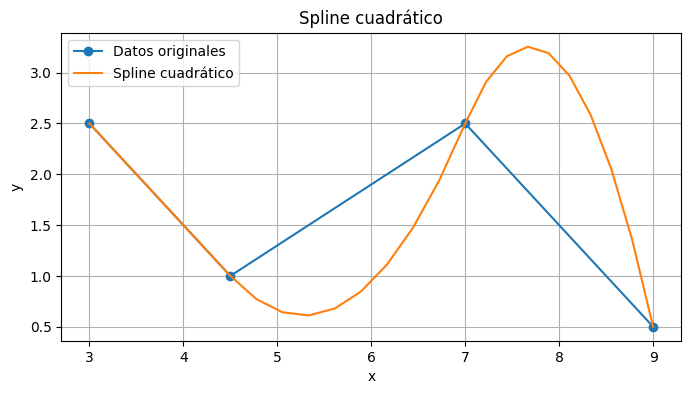

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def spline_cuadratico(x, y):
    """
    Calcula el spline cuadrático para los puntos dados.
    Args:
        x (list): Coordenadas x de los puntos.
        y (list): Coordenadas y de los puntos.
    Returns:
        coeficientes (list): Lista de coeficientes (a, b, c) por intervalo.
        x_interp (ndarray): Valores x interpolados.
        y_interp (ndarray): Valores y interpolados.
    """
    n = len(x) - 1  # Número de intervalos
    A = np.zeros((3 * n, 3 * n))  # Matriz de coeficientes
    b = np.zeros(3 * n)           # Vector de términos independientes

    # Condición 1: Paso por los puntos (valores extremos e interiores)
    fila = 0
    for i in range(n):
        # Para x_i
        A[fila, 3 * i:3 * i + 3] = [x[i]**2, x[i], 1]
        print(f'C11_A={A}')
        b[fila] = y[i]
        print(f'C11_b={b}')
        fila += 1
        # Para x_{i+1}
        A[fila, 3 * i:3 * i + 3] = [x[i + 1]**2, x[i + 1], 1]
        print(f'C12_A={A}')
        b[fila] = y[i + 1]
        print(f'C12_b={b}')
        fila += 1

    # Condición 2: Igualdad de derivadas en los nodos interiores
    for i in range(1, n):
        A[fila, 3 * (i - 1):3 * (i - 1) + 2] = [2 * x[i], 1]  # Derivada del intervalo anterior
        A[fila, 3 * i:3 * i + 2] = [-2 * x[i], -1]           # Derivada del intervalo actual
        fila += 1

    # Condición 3: Segunda derivada nula en el primer nodo
    A[fila, 0] = 2
    b[fila] = 0

    # Resolver el sistema lineal
    coeficientes = np.linalg.solve(A, b)

    # Organizar coeficientes por intervalos
    coef_intervalos = []
    for i in range(n):
        a, b, c = coeficientes[3 * i:3 * i + 3]
        coef_intervalos.append((a, b, c))

    # Interpolación para graficar
    x_interp = []
    y_interp = []
    for i in range(n):
        a, b, c = coef_intervalos[i]
        x_vals = np.linspace(x[i], x[i + 1], 10)
        y_vals = a * x_vals**2 + b * x_vals + c
        x_interp.extend(x_vals)
        y_interp.extend(y_vals)

    return coef_intervalos, np.array(x_interp), np.array(y_interp)


# Datos iniciales
x = [3, 4.5, 7, 9]
y = [2.5, 1, 2.5, 0.5]

# Calcular spline cuadrático
coeficientes, x_interp, y_interp = spline_cuadratico(x, y)

# Imprimir coeficientes de cada intervalo
for i, (a, b, c) in enumerate(coeficientes):
    print(f"Intervalo {i}: a = {a}, b = {b}, c = {c}")

# Graficar resultados
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o-', label='Datos originales')
plt.plot(x_interp, y_interp, label='Spline cuadrático')
plt.title("Spline cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Usando Scipy

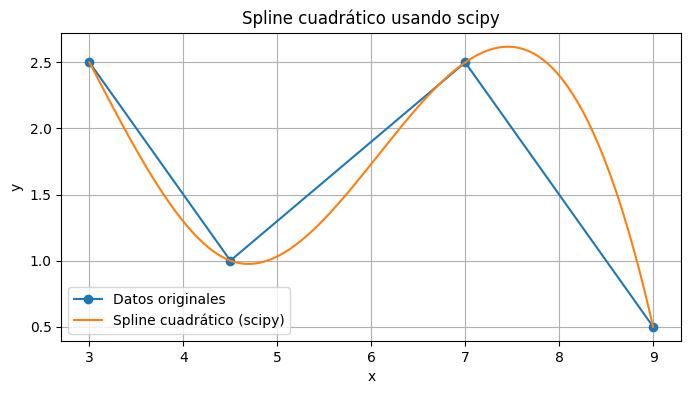

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Datos iniciales
x = [3, 4.5, 7, 9]
y = [2.5, 1, 2.5, 0.5]

# Construcción del spline cuadrático usando condiciones específicas
# CubicSpline permite configurar "bc_type" para establecer las condiciones
spline = CubicSpline(x, y, bc_type=((2, 0), 'not-a-knot'))

# Puntos interpolados para graficar
x_interp = np.linspace(min(x), max(x), 200)
y_interp = spline(x_interp)

# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o-', label='Datos originales')
plt.plot(x_interp, y_interp, label='Spline cuadrático (scipy)')
plt.title("Spline cuadrático usando scipy")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Spline cúbico

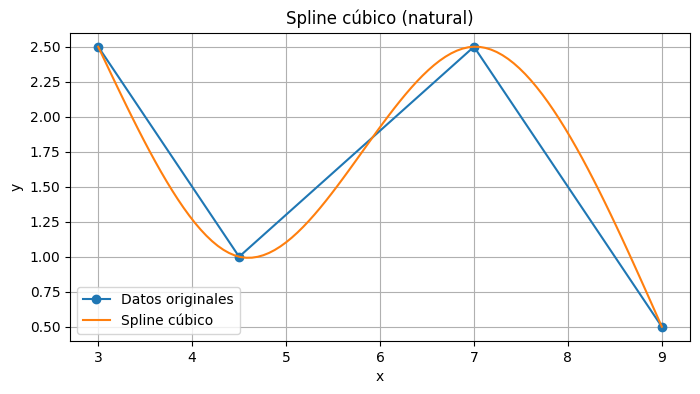

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Datos iniciales
x = [3, 4.5, 7, 9]
y = [2.5, 1, 2.5, 0.5]

# Crear el spline cúbico
spline_cubico = CubicSpline(x, y, bc_type='natural')

# Generar puntos para interpolar
x_interp = np.linspace(min(x), max(x), 100)
y_interp = spline_cubico(x_interp)

# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o-', label='Datos originales')
plt.plot(x_interp, y_interp, '-', label='Spline cúbico')
plt.title("Spline cúbico (natural)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Interpolación 2D

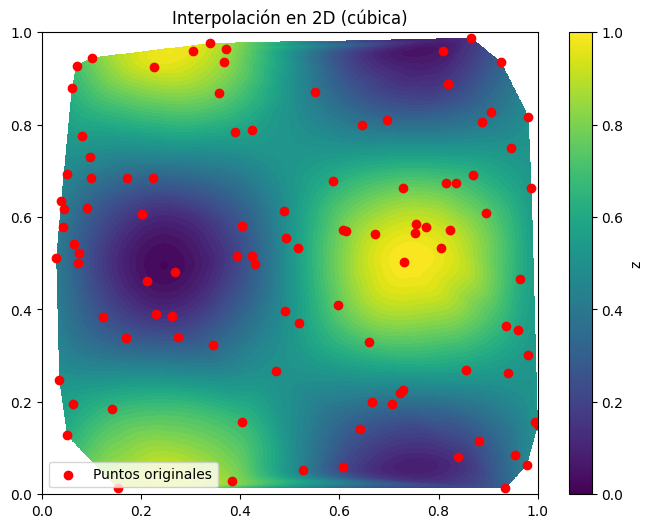

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Datos dispersos
x = np.random.rand(100)
y = np.random.rand(100)
z = np.sin(2 * np.pi * x) * np.cos(2 * np.pi * (y))

# Puntos para la rejilla
xi = np.linspace(0, 1, 1000)
yi = np.linspace(0, 1, 1000)
xi, yi = np.meshgrid(xi, yi)

# Interpolación
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Graficar
plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, levels=50, cmap='viridis')
plt.scatter(x, y, color='red', label='Puntos originales')
plt.title('Interpolación en 2D (cúbica)')
plt.colorbar(label='z')
plt.legend()
plt.show()


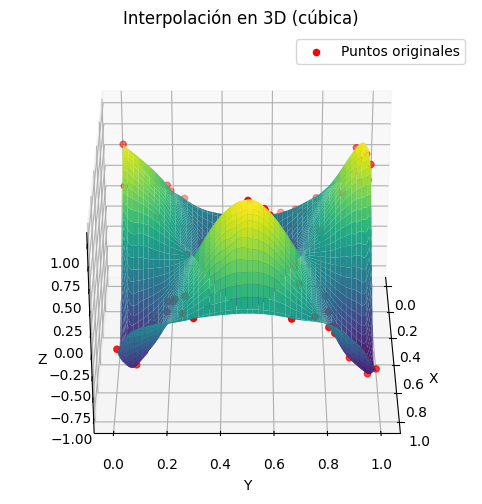

In [82]:
# Modificación del código para graficar en 3D
from mpl_toolkits.mplot3d import Axes3D

# Graficar en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Graficar los puntos originales
ax.scatter(x, y, z, color='red', label='Puntos originales')

# Etiquetas y título
ax.set_title('Interpolación en 3D (cúbica)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.view_init(
    azim=0, elev=30
)
plt.show()


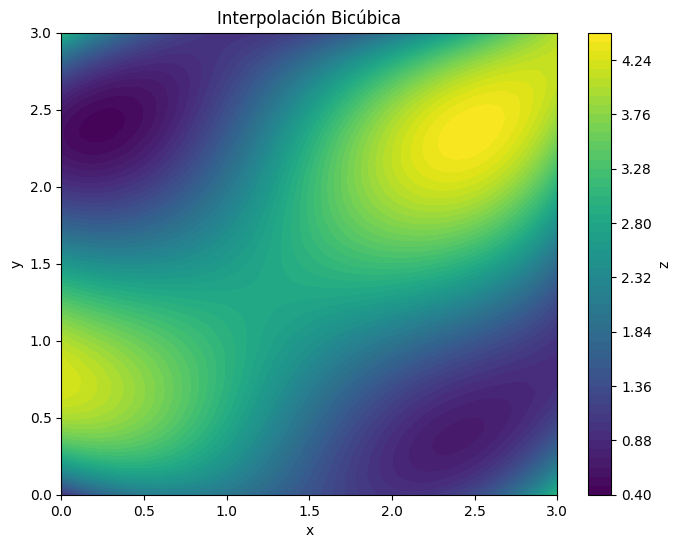

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# Definimos una cuadrícula de ejemplo
x = np.linspace(0, 3, 4)  # Coordenadas x
y = np.linspace(0, 3, 4)  # Coordenadas y
z = np.array([[1, 2, 1, 3],  # Valores z
              [4, 3, 2, 1],
              [1, 2, 4, 3],
              [3, 1, 2, 4]])

# Creamos el spline bicúbico
spline = RectBivariateSpline(x, y, z)

# Puntos a interpolar
x_interp = np.linspace(0, 3, 50)
y_interp = np.linspace(0, 3, 50)
z_interp = spline(x_interp, y_interp)

# Graficamos la superficie original y la interpolada
X, Y = np.meshgrid(x_interp, y_interp)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, z_interp, levels=50, cmap='viridis')
plt.colorbar(label='z')
plt.title('Interpolación Bicúbica')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


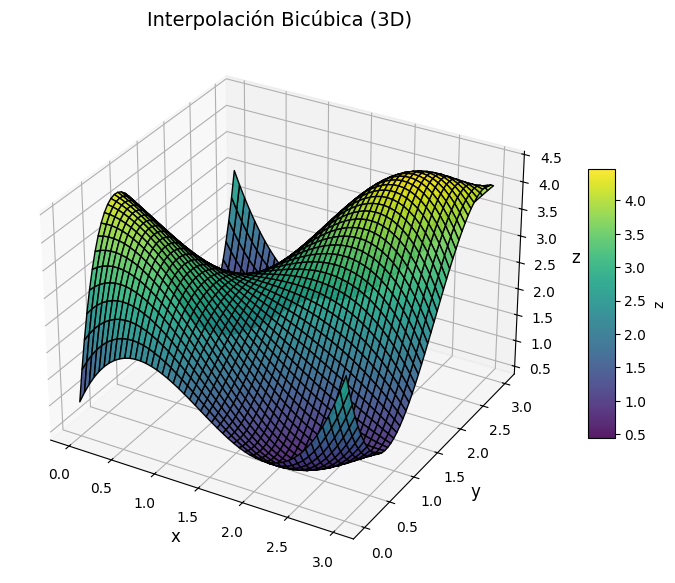

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa herramientas para gráficos 3D

# Crear la figura y un objeto Axes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, z_interp, cmap='viridis', edgecolor='k', alpha=0.9)

# Añadir una barra de color para representar valores z
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='z')

# Etiquetas y título
ax.set_title('Interpolación Bicúbica (3D)', fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)

# Mostrar el gráfico
plt.show()


# B-Splines

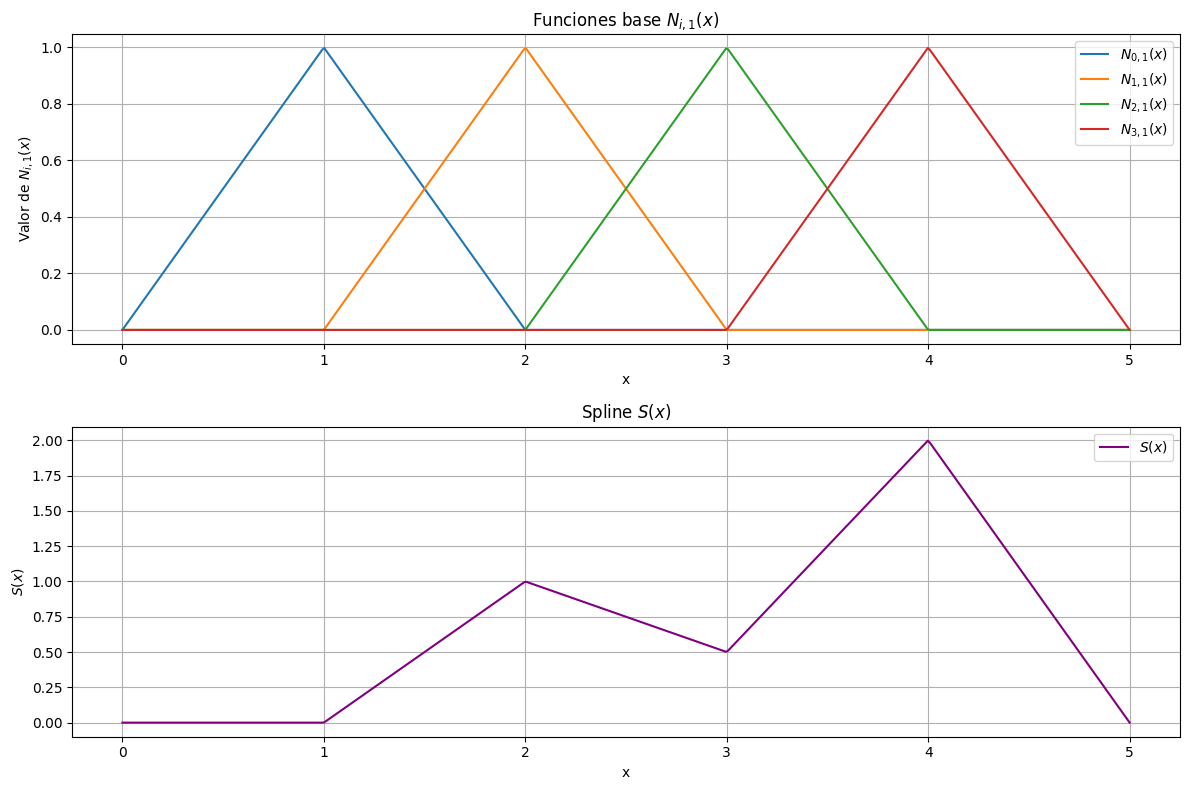

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los nodos
t = np.array([0, 1, 2, 3, 4, 5])

# Puntos de control
c = np.array([0, 1, 0.5, 2])

# Definimos los intervalos donde queremos evaluar
x_vals = np.linspace(0, 5, 500)

# Función base de grado 0
def N_0(i, x, t):
    return np.where((x >= t[i]) & (x < t[i+1]), 1, 0)

# Función base de grado 1
def N_1(i, x, t):
    term1 = np.where(t[i+1] - t[i] != 0, (x - t[i]) / (t[i+1] - t[i]), 0) * N_0(i, x, t)
    term2 = np.where(t[i+2] - t[i+1] != 0, (t[i+2] - x) / (t[i+2] - t[i+1]), 0) * N_0(i+1, x, t)
    return term1 + term2

# Calculamos los valores de N_{i,1}(x) para i = 0, 1, 2, 3
N1_0_vals = N_1(0, x_vals, t)
N1_1_vals = N_1(1, x_vals, t)
N1_2_vals = N_1(2, x_vals, t)
N1_3_vals = N_1(3, x_vals, t)

# Spline S(x)
S_vals = c[0] * N1_0_vals + c[1] * N1_1_vals + c[2] * N1_2_vals + c[3] * N1_3_vals

# Gráficas
plt.figure(figsize=(12, 8))

# Subgráfica de las funciones base N_{i,1}(x)
plt.subplot(2, 1, 1)
plt.plot(x_vals, N1_0_vals, label=r"$N_{0,1}(x)$")
plt.plot(x_vals, N1_1_vals, label=r"$N_{1,1}(x)$")
plt.plot(x_vals, N1_2_vals, label=r"$N_{2,1}(x)$")
plt.plot(x_vals, N1_3_vals, label=r"$N_{3,1}(x)$")
plt.title("Funciones base $N_{i,1}(x)$")
plt.xlabel("x")
plt.ylabel("Valor de $N_{i,1}(x)$")
plt.legend()
plt.grid()

# Subgráfica del spline S(x)
plt.subplot(2, 1, 2)
plt.plot(x_vals, S_vals, label=r"$S(x)$", color="purple")
plt.title("Spline $S(x)$")
plt.xlabel("x")
plt.ylabel("$S(x)$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# B-Spline - Cúbico - Python

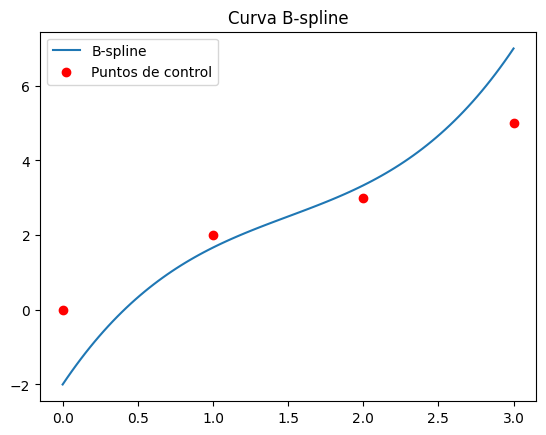

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Datos de entrada
# Puntos de control (en este caso, 4 puntos)
control_points = np.array([0, 2, 3, 5])

# Nudos (ahora con 8 nudos, lo que es necesario para grado 3)
# Los nudos deben tener al menos grado + 1 nudos en los extremos, y el total debe ser grado + 2 veces el número de puntos de control
nudos = np.array([0, 0, 0, 1, 2, 3, 3, 3])

# Grado del B-spline (cúbico, grado 3)
grado = 3

# Crear el B-spline
spline = BSpline(nudos, control_points, grado)

# Evaluar la curva B-spline en varios puntos
x_vals = np.linspace(0, 3, 100)
y_vals = spline(x_vals)

# Visualizar
plt.plot(x_vals, y_vals, label='B-spline')
plt.scatter([0, 1, 2, 3], control_points, color='red', label='Puntos de control')
plt.legend()
plt.title('Curva B-spline')
plt.show()


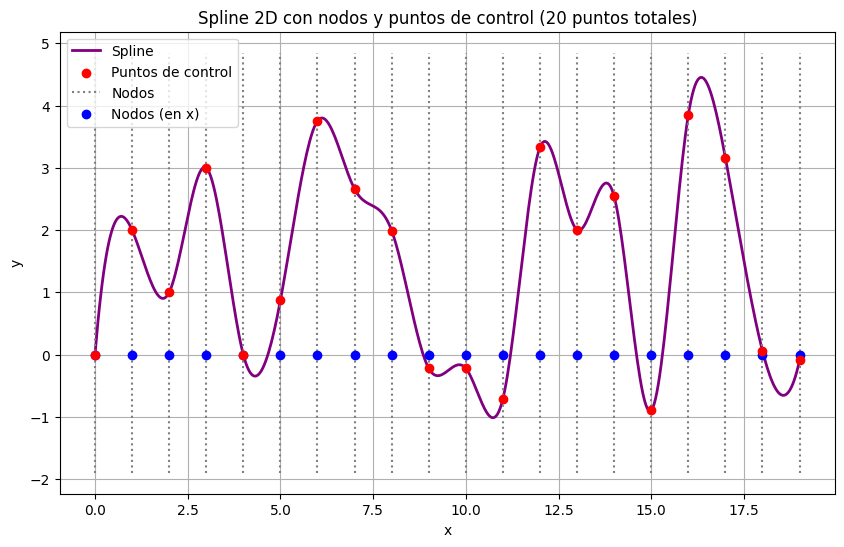

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Generamos 15 puntos de control adicionales (puedes ajustar esto)
np.random.seed(42)  # Fijamos la semilla para reproducibilidad
puntos_control_extra = np.array([
    [i, np.random.uniform(-1, 4)] for i in range(5, 20)
])

# Puntos originales
puntos_control_original = np.array([[0, 0], [1, 2], [2, 1], [3, 3], [4, 0]])

# Combinamos los puntos originales con los nuevos
puntos_control = np.vstack((puntos_control_original, puntos_control_extra))

# Nodos (coordenadas x de los puntos de control)
x_control = puntos_control[:, 0]
y_control = puntos_control[:, 1]

# Crear el B-spline
x_vals = np.linspace(x_control.min(), x_control.max(), 500)  # Valores finos para interpolación
spline_x = make_interp_spline(x_control, x_control, k=3)  # Spline cúbico para coordenadas x
spline_y = make_interp_spline(x_control, y_control, k=3)  # Spline cúbico para coordenadas y

# Evaluamos el spline
x_spline = spline_x(x_vals)
y_spline = spline_y(x_vals)

# Gráfica
plt.figure(figsize=(10, 6))

# Spline interpolado
plt.plot(x_spline, y_spline, label="Spline", color="purple", linewidth=2)

# Puntos de control
plt.scatter(x_control, y_control, color="red", label="Puntos de control", zorder=5)

# Nodos
plt.vlines(x_control, ymin=y_control.min() - 1, ymax=y_control.max() + 1,
           linestyles="dotted", color="gray", label="Nodos")
plt.scatter(x_control, np.zeros_like(x_control), color="blue", label="Nodos (en x)", zorder=4)

# Configuraciones finales
plt.title("Spline 2D con nodos y puntos de control (20 puntos totales)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


# B-spline - 2D

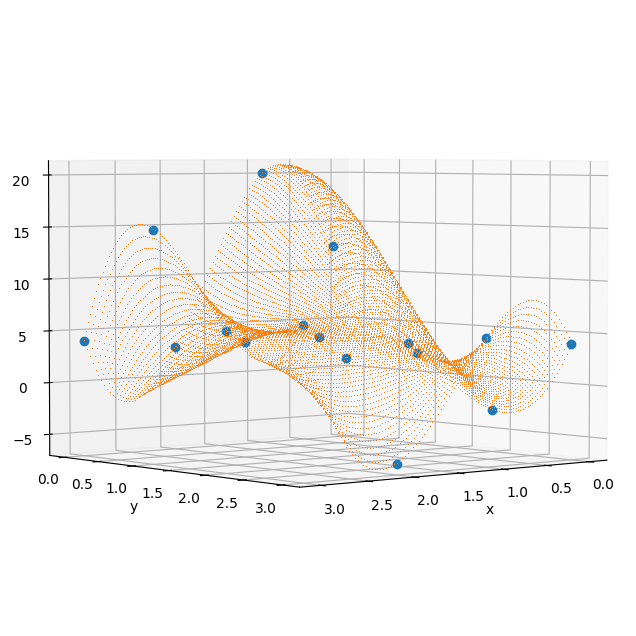

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# Definir los datos de entrada (ahora con 4 puntos en cada dirección)
x = np.linspace(0, 3, 4)
y = np.linspace(0, 3, 4)
z = np.array([[1, 20, 3, 4],
              [2, 13, 4, 15],
              [-3, 4, 5, 6],
              [4, 5, -6, 7]])
X, Y = np.meshgrid(x, y)
# Crear el objeto de interpolación B-spline bidimensional
interp = RectBivariateSpline(x, y, z)

# Evaluar la superficie en puntos intermedios
fin =100
xnew = np.linspace(0, 3, fin)
ynew = np.linspace(0, 3, fin)
Znew = interp(xnew, ynew)

# Graficar la superficie interpolada
Xnew, Ynew = np.meshgrid(xnew, ynew)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(Xnew, Ynew, Znew, cmap='viridis',alpha=0.1)
# ax.plot_wireframe(Xnew, Ynew, Znew,alpha=0.1)
# ax.plot_surface(X, Y, z, cmap='viridis',alpha=0.1)
ax.plot(X, Y, z,'o',alpha=1)
ax.plot(Xnew, Ynew, Znew,',',alpha=1)
ax.view_init(azim=50,elev=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


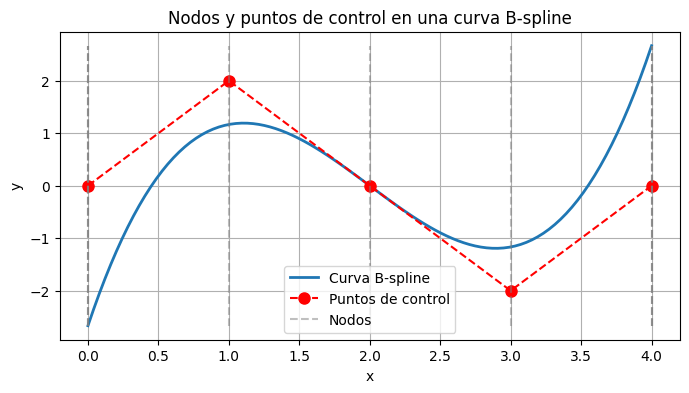

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Nodos (knot vector)
t = np.array([0, 0, 0, 1, 2, 3, 4, 4, 4])  # Grado cúbico, nodos repetidos para borde

# Puntos de control
c = np.array([0, 2, 0, -2, 0])  # Afectan la forma de la curva

# Grado del spline
k = 3

# Crear el B-spline
spline = BSpline(t, c, k)

# Evaluar el spline
x = np.linspace(t[0], t[-1], 100)
y = spline(x)

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Curva B-spline', lw=2)
plt.plot(c, 'ro--', label='Puntos de control', markersize=8)
plt.vlines(t, ymin=min(y), ymax=max(y), colors='gray', linestyle='dashed', alpha=0.5, label='Nodos')
plt.title("Nodos y puntos de control en una curva B-spline")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
